In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import joblib
from matplotlib import pyplot as plt
import os
import gc
from load_dataset import get_input_seqs_dataloader
import utils
import lightning.pytorch as pl
from lightning.pytorch.callbacks import EarlyStopping
import shutil
from sklearn.model_selection import KFold
from torch.utils.data import DataLoader
from scipy import spatial as sp
from Architectures.decoder_conv import Decoder
from Architectures.encoder_conv import Encoder
from Architectures.autoencoder_conv_pl import Autoencoder
import sys


c:\Users\Jean-Luc\.conda\envs\protein-protein\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
data = joblib.load('data/latent_dim_500.joblib')

In [2]:
all_data = joblib.load('data/AA_orth_500.joblib')

In [6]:
random_matrices = joblib.load('data/AA_random_matrices_orth.joblib')

In [7]:
model = joblib.load("models/K-folds/1024_[500, 512, 256, 128]_64_Tanh_AdamW_MSELoss_0_False_3_1_2")

In [10]:
decoder = model.decoder

In [11]:
res = []
for latent, seq in zip(data['inputs'][:10000], data['sequences'][:10000]):
    output = decoder(latent)
    reconstructed = ''.join(utils.reconstruct_sequence(random_matrices, output.detach())[0])
    res.append((sum(x != y for x, y in zip(reconstructed, seq[0].ljust(500,'_'))),len(seq[0])))
    # if (res[-1] == 0 ):
    #     print(reconstructed, seq[0], sep='\n')
    #     print()
    

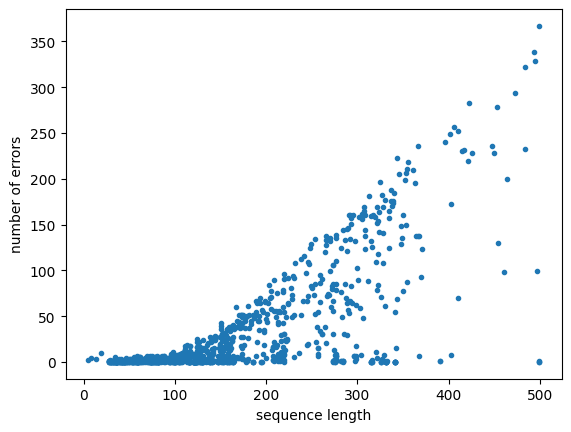

In [26]:
plt.scatter([x[1] for x in res[:1000]], [x[0] for x in res[:1000]], data='scatter', marker='.')
plt.xlabel('sequence length')
plt.ylabel('number of errors')
plt.show()

In [22]:
np.mean(res), np.std(res), np.count_nonzero(res==0)

(31.1422, 57.13897600727545, 0)

In [38]:
index_max = res.index(max(res))
decoded = decoder(data['inputs'][index_max])
print(res[index_max], ''.join(utils.reconstruct_sequence(random_matrices, decoded.detach())[0]))
print(data['sequences'][index_max][0])

1904 DDKAKDKADDDDADDAAAADDDDIAADAAALDDADIDVVVDVVVVDADVVKLDVDLADLKKVKLEVVVKVIVLKLIEVKVVVKKVVKVKKLKKVKIIVKIILLKLAKPAVELIQIDDDADPPDEEPADADDDDIDDAIDDDDADDEDDEDDLEDAAKDKDAAADELEDLAAALLLDKDVVDAEAEAAALAADDELLKAEAALPEDEVLLLCLAVALLLPLAAADAPADLVDLVLDDELADLTDLDDLLLLALDLDLILLDLLLDLDLLLLLLLDLLLLLLDLLDILLLLLDLDELALLLLLLLLLLLLLLKLLLLLLLLLPLLLLLLLLKLAKLKLLLLLL____LE_____KKKKL_IKK_KK_KALAAALLDLKAAKKAKKYKKLLLDLLLAKAALILYYKKKALAEALLALAKLYYYVALLLLAKYYKKACKLAALAEYKLAYLVLYAKLLKKLKAYALAKKEALYAAPLAKLDLLLLLLTAALALKLLLLCLLLAKAAALLLLVAAAYCAAKALTVFTLAAAEALALLVNAAVAAVLLLLADAALKALEAALALLLLTLEVEDAAELAALAALLLQVLDLMAAILATLLAAYATLLVLLLLSAVLNLDAEVAQESLLEYEDLLLDAADALLLALEALLDLYLLATVVELLALLLLEAALLLLLLAALATNVLLLLGLEAAAEEVLLDAAAASYLDEDLLEATLAALLDIYLLLLLDLLQAWLLLL______________________________L_____________________L_____________________________________________________________________________________________________________________________________________________________________________________________________________________

In [22]:
def plot_bar_graph(data, interval, title=''):
    # Determine the range for the x-axis and number of bins
    min_value = min(data)
    max_value = max(data)
    num_bins = (max_value - min_value) // interval + 1
    
    # Create histogram bins
    bins = [min_value + i * interval for i in range(num_bins)]

    
    # Plot the histogram
    plt.hist(data, bins=bins, edgecolor='black')
    
    # Configure the graph
    plt.xlabel('Interval')
    plt.ylabel('Frequency')
    plt.title(title)
    
    # Display the graph
    plt.show()


In [47]:
def count_elements_higher_than(lst, value):
    arr = np.array(lst)
    count = np.sum(arr > value)
    return count

In [58]:
def remove_elements_higher_than(lst, value):
    arr = np.array(lst)
    filtered_arr = arr[arr <= value]
    result = filtered_arr.tolist()
    return result

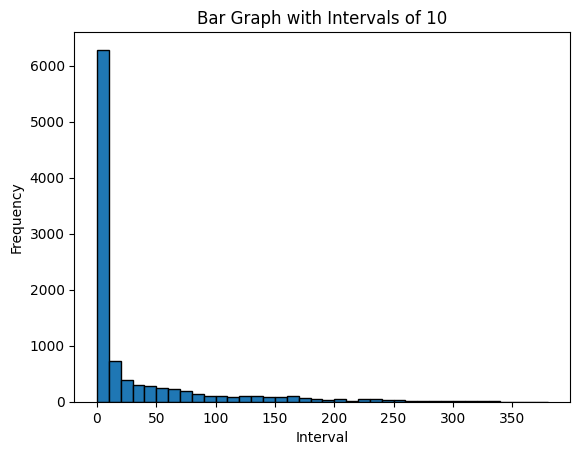

In [24]:
plot_bar_graph([x[0] for x in res], 10)

In [42]:
len_seqs = [len(x[0]) for x in data['sequences']]

In [44]:
np.mean(len_seqs), np.std(len_seqs)
    

(177.67215413974662, 133.29219565773803)

In [57]:
count_elements_higher_than(len_seqs,500)

1186

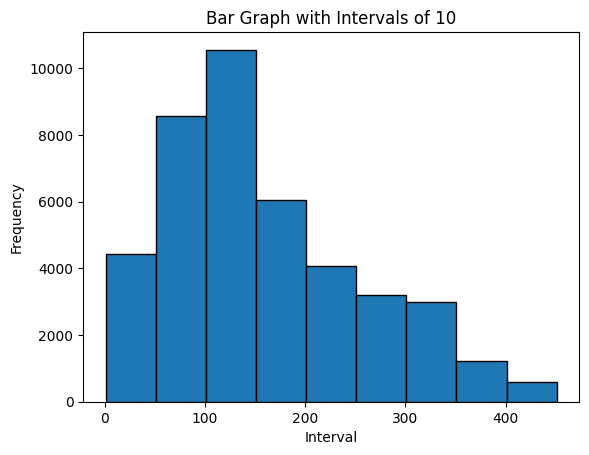

In [21]:
plot_bar_graph([len(x[0]) for x in data['sequences']], 50)